In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [232]:
warnings.filterwarnings('ignore')

In [233]:
# load the data
df = pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [234]:
df.shape

(1303, 12)

In [235]:
df.duplicated().sum()

0

In [236]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [238]:
# drop the Unnamed: 0
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [239]:
df['Price'].describe()

count      1303.000000
mean      59870.042910
std       37243.201786
min        9270.720000
25%       31914.720000
50%       52054.560000
75%       79274.246400
max      324954.720000
Name: Price, dtype: float64

Text(0.5, 1.0, 'Price Distribution')

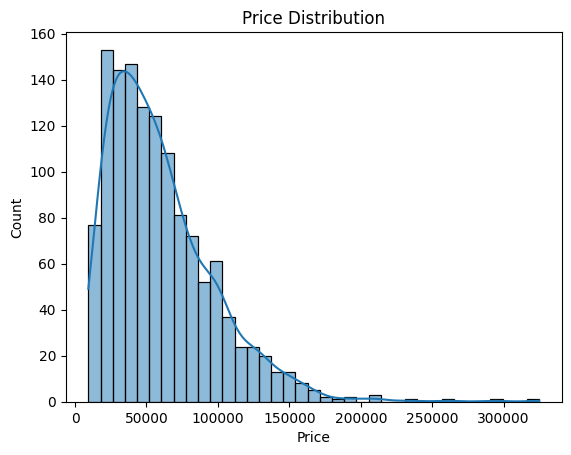

In [240]:
sns.histplot(df, x='Price', kde=True)
plt.title('Price Distribution')

Price column is right skewed

In [241]:
df["Price"].skew()

1.5208655681688517

## **Univariate and Bivariate Analysis**

In [242]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int')
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


Text(0.5, 1.0, 'Ram Distribution')

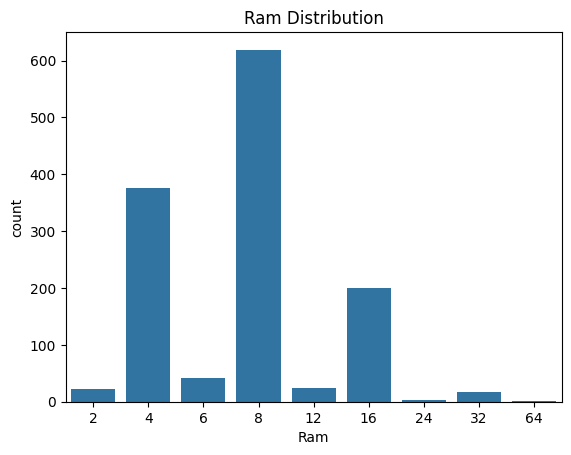

In [243]:
sns.countplot(df, x='Ram', stat='count')
plt.title('Ram Distribution')

Text(0.5, 1.0, 'Weight Distribution')

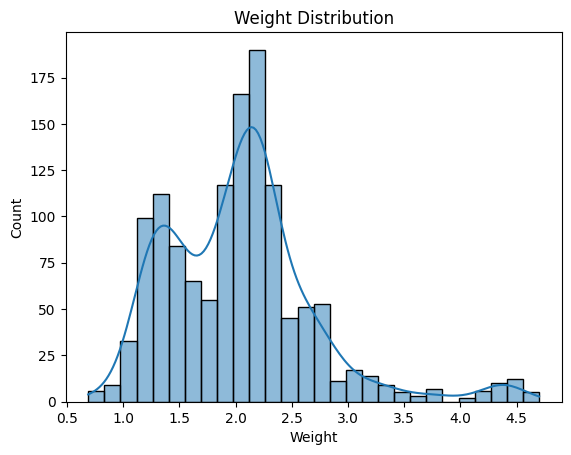

In [244]:
sns.histplot(df, x='Weight', kde=True)
plt.title('Weight Distribution')

Text(0.5, 1.0, 'Inches Distribution')

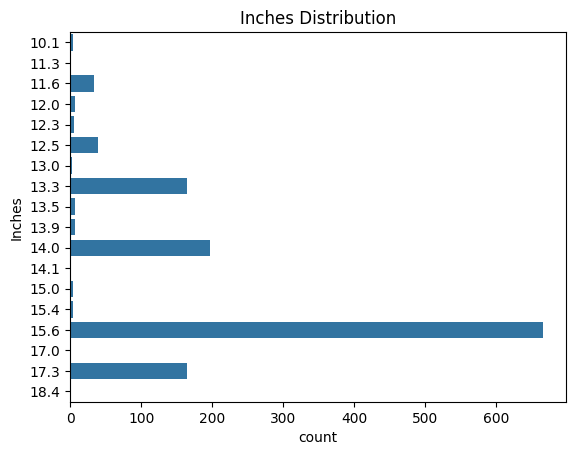

In [245]:
sns.countplot(df, y='Inches')
plt.title('Inches Distribution')

<Axes: xlabel='Inches', ylabel='Price'>

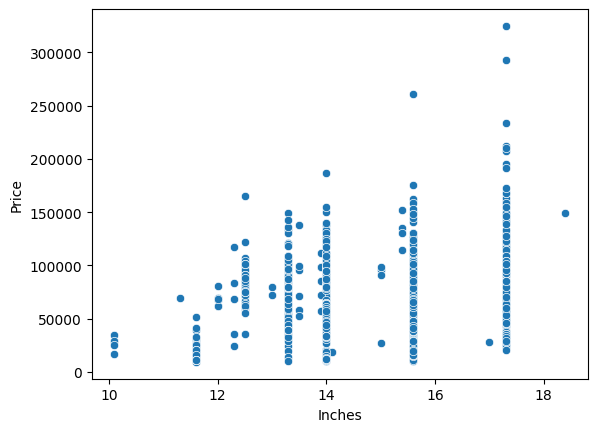

In [246]:
sns.scatterplot(df, x='Inches', y='Price')

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


Text(0.5, 1.0, 'Company Distribution')

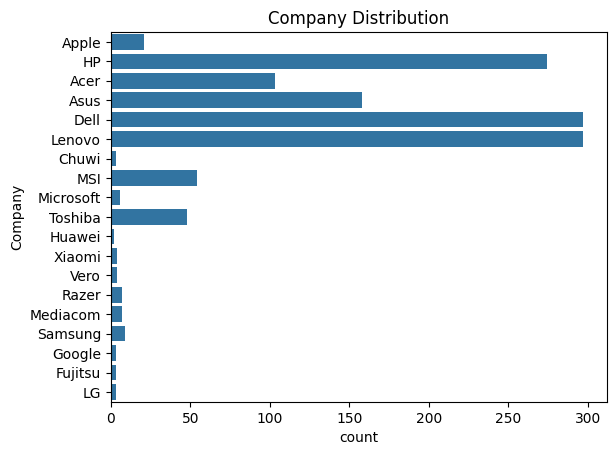

In [247]:
print(df['Company'].value_counts())
sns.countplot(df, y='Company')
plt.title('Company Distribution')

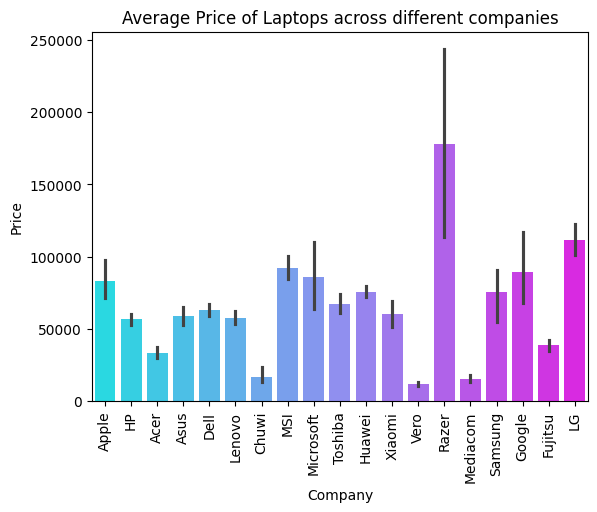

In [248]:
sns.barplot(df, x='Company', y='Price', estimator='mean', palette='cool')
plt.xticks(rotation=90)
plt.title('Average Price of Laptops across different companies')
plt.show()

Text(0.5, 1.0, 'TypeName Distribution')

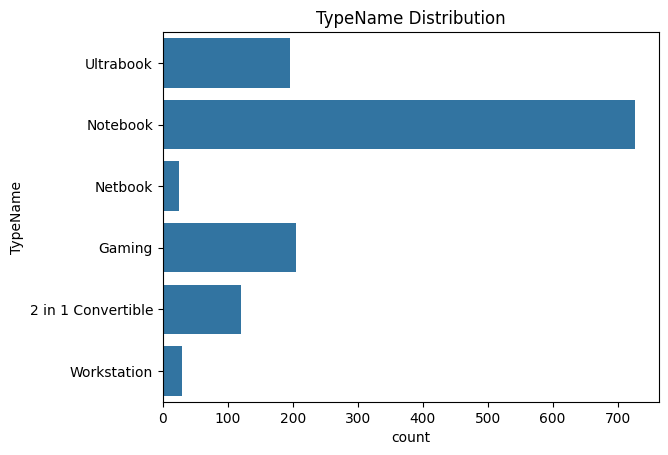

In [249]:
sns.countplot(df, y='TypeName')
plt.title('TypeName Distribution')

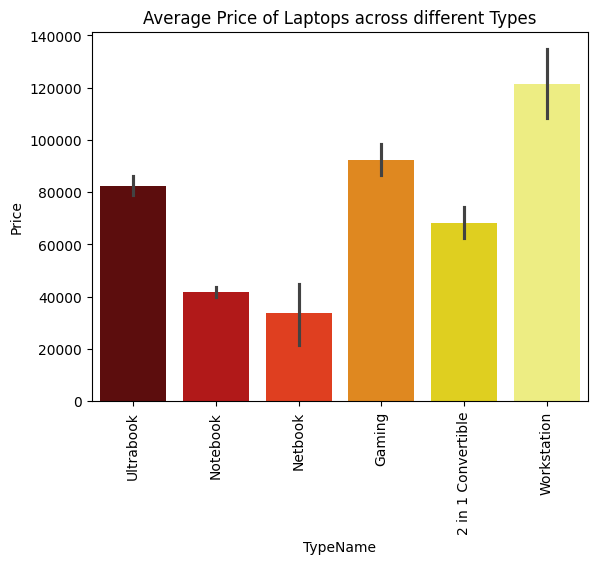

In [250]:
sns.barplot(df, x='TypeName', y='Price', estimator='mean', palette='hot')
plt.xticks(rotation=90)
plt.title('Average Price of Laptops across different Types')
plt.show()

In [251]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [252]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda screen: 1 if 'Touchscreen' in screen else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


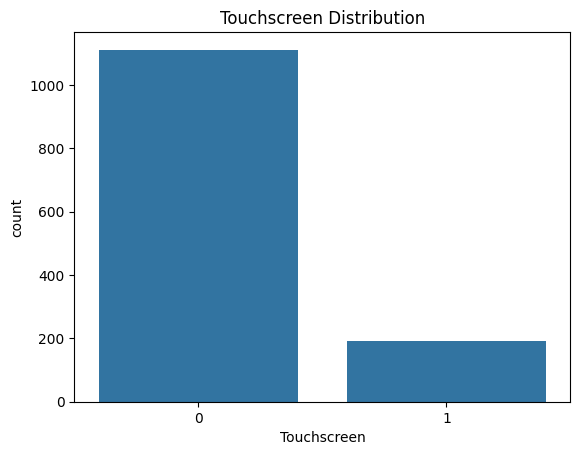

In [253]:
sns.countplot(df, x='Touchscreen')
plt.title('Touchscreen Distribution')
plt.show()

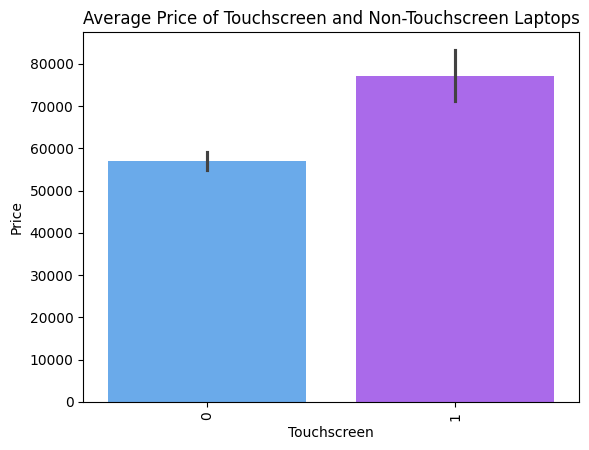

In [254]:
sns.barplot(df, x='Touchscreen', y='Price', estimator='mean', palette='cool')
plt.xticks(rotation=90)
plt.title('Average Price of Touchscreen and Non-Touchscreen Laptops')
plt.show()

In [255]:
df['IPSpanel'] = df['ScreenResolution'].apply(lambda screen: 1 if 'IPS Panel' in screen else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


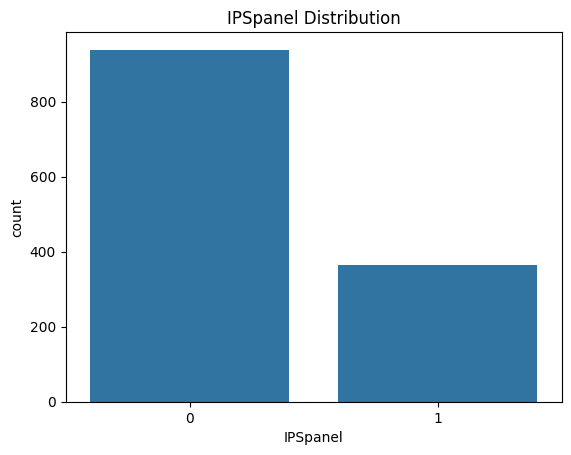

In [256]:
sns.countplot(df, x='IPSpanel')
plt.title('IPSpanel Distribution')
plt.show()

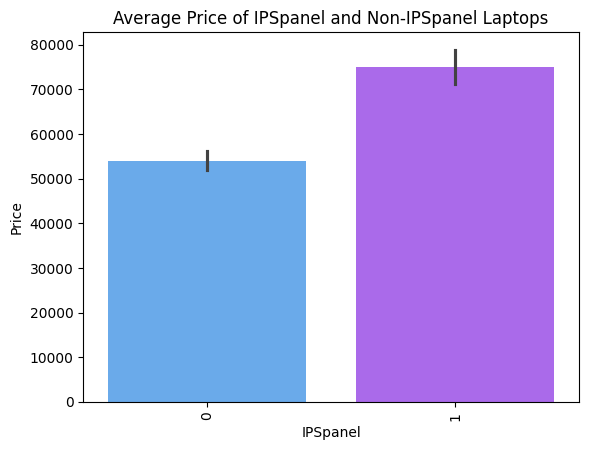

In [257]:
sns.barplot(df, x='IPSpanel', y='Price', estimator='mean', palette='cool')
plt.xticks(rotation=90)
plt.title('Average Price of IPSpanel and Non-IPSpanel Laptops')
plt.show()

In [258]:
df['X_resolution'] = df['ScreenResolution'].str.split().str.get(-1).str.split('x').str.get(0).astype('int')
df['Y_resolution'] = df['ScreenResolution'].str.split().str.get(-1).str.split('x').str.get(1).astype('int')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [259]:
df["PPI"] = ((df['X_resolution']**2 + df['Y_resolution']**2) )**0.5 / (df['Inches'])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,X_resolution,Y_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [260]:
df.corr(numeric_only=True)['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPSpanel        0.252208
X_resolution    0.556529
Y_resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

In [261]:
df['RetinaDisplay'] = df['ScreenResolution'].apply(lambda screen: 1 if 'Retina Display' in screen else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,X_resolution,Y_resolution,PPI,RetinaDisplay
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,1


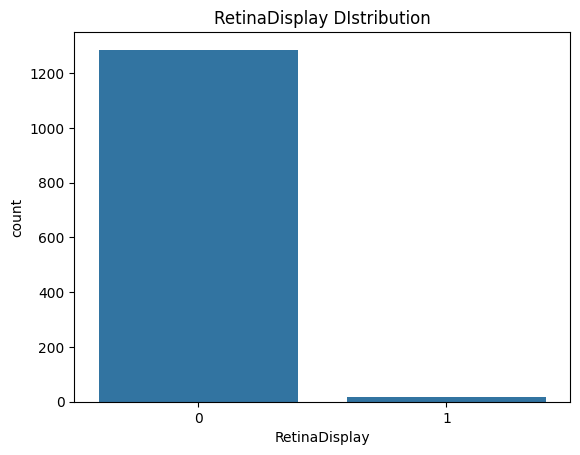

In [262]:
sns.countplot(df, x='RetinaDisplay')
plt.title('RetinaDisplay DIstribution')
plt.show()

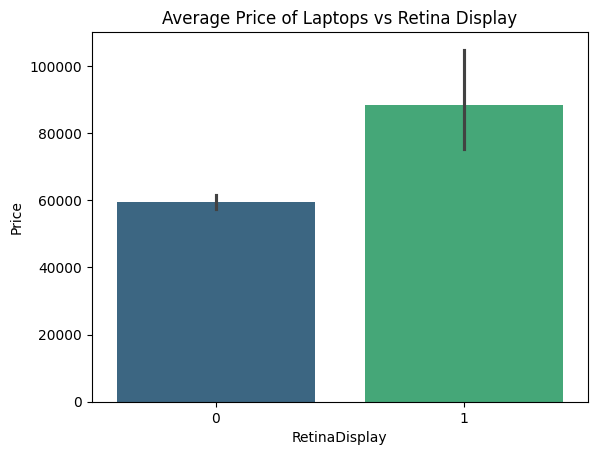

In [263]:
sns.barplot(df, x='RetinaDisplay', y='Price', palette='viridis')
plt.title('Average Price of Laptops vs Retina Display')
plt.show()

In [264]:
df.drop(columns=['Inches', 'X_resolution', 'Y_resolution', 'ScreenResolution'], inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,1
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,1


In [265]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [266]:
# extract the frequency of the cpu
df['CPU_freq'] = df['Cpu'].str.split().str.get(-1).str.replace('GHz', '').astype('float')
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,1,2.3
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,1.8
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,2.5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1,2.7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,1,3.1


In [267]:
# CPU_freq shows a moderate correlation with Price
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPSpanel         0.252208
PPI              0.473487
RetinaDisplay    0.087895
CPU_freq         0.430293
Name: Price, dtype: float64

In [268]:
# extracting the brand name of the CPU
df['CPU_brand'] = df['Cpu'].str.split().str.get(0)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,1,2.3,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,1.8,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,2.5,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1,2.7,Intel
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,1,3.1,Intel


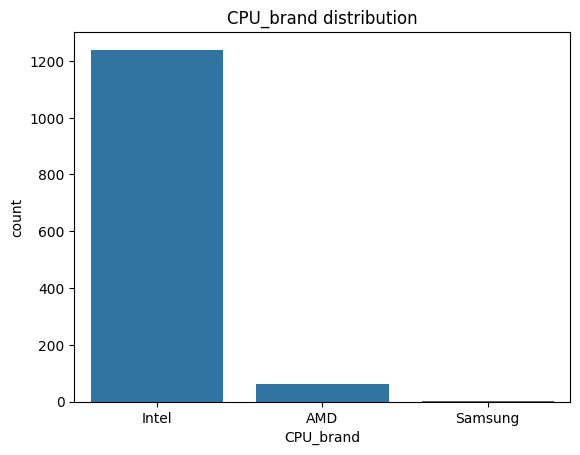

In [269]:
sns.countplot(df, x='CPU_brand')
plt.title('CPU_brand distribution')
plt.show()

In [270]:
# drop the Samsung brand CPU because there is only brand of it
df = df[df['CPU_brand'] != 'Samsung']
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,1,2.3,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,1.8,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,2.5,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1,2.7,Intel
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,1,3.1,Intel


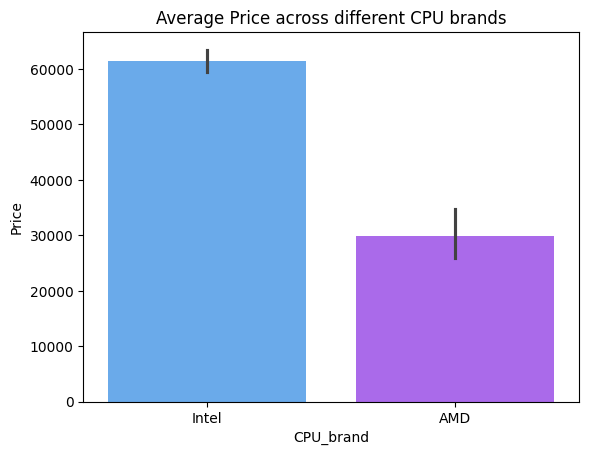

In [271]:
sns.barplot(df, x='CPU_brand', y='Price', palette='cool')
plt.title('Average Price across different CPU brands')
plt.show()

In [ ]:
# defining function for extracting processors
intel_cpus = ['core i3', 'core i5', 'core i7']
amd_cpus = ['ryzen', 'a4', 'a6', 'a8', 'a9', 'a10', 'a12']

def search_processor(brand_cpus, cpu_model):
    for cpu in brand_cpus:
        if cpu in cpu_model:
            return cpu
    return 'other'

def get_processor(brand, cpu_model):
    if brand == 'Intel':
        processor = search_processor(intel_cpus, cpu_model)
        if processor == 'other':
            return f"{processor} {brand.lower()} processors"
        return processor
    else:
        processor = search_processor(amd_cpus, cpu_model)
        if processor == 'other':
            return f"{processor} {brand.lower()} processors"
        elif 'a' in processor:
            return 'a-series'
        return processor

In [273]:
df['Processor'] = df.apply(lambda x: get_processor(x['CPU_brand'], x['Cpu'].lower()), axis=1)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand,Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,1,2.3,Intel,core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,1.8,Intel,core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,2.5,Intel,core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1,2.7,Intel,core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,1,3.1,Intel,core i5


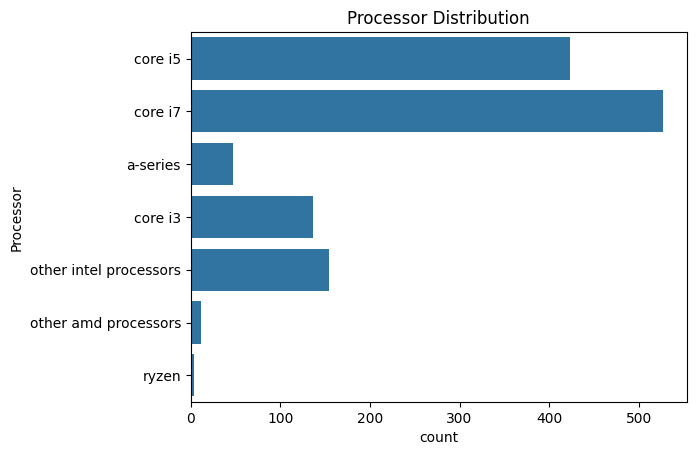

In [274]:
sns.countplot(df, y='Processor')
plt.title('Processor Distribution')
plt.show()

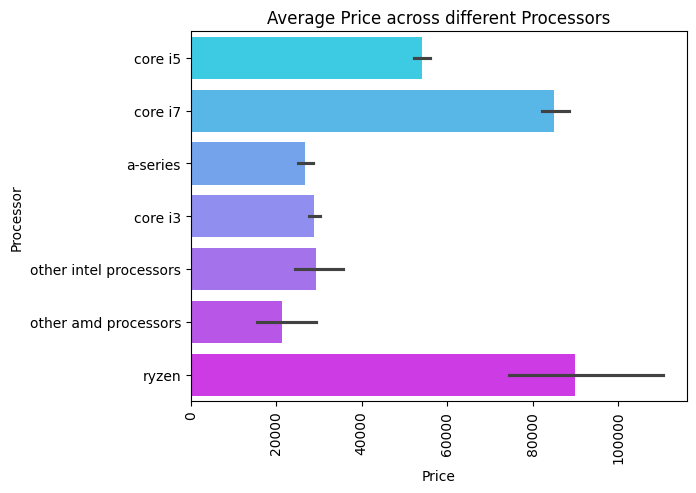

In [275]:
sns.barplot(df, y='Processor', x='Price', palette='cool')
plt.title('Average Price across different Processors')
plt.xticks(rotation=90)
plt.show()

In [276]:
df.drop(columns='Cpu', inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand,Processor
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,1,2.3,Intel,core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,1.8,Intel,core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,2.5,Intel,core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1,2.7,Intel,core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,1,3.1,Intel,core i5


In [277]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [278]:
def merge_os(os):
    os = os.lower()
    if"windows" in os:
        return 'Windows'
    elif 'mac' in os:
        return 'Mac'
    else:
        return 'No OS, Linux, Other OS'
    
df['OS'] = df['OpSys'].apply(merge_os)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand,Processor,OS
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,1,2.3,Intel,core i5,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,1.8,Intel,core i5,Mac
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,2.5,Intel,core i5,"No OS, Linux, Other OS"
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1,2.7,Intel,core i7,Mac
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,1,3.1,Intel,core i5,Mac


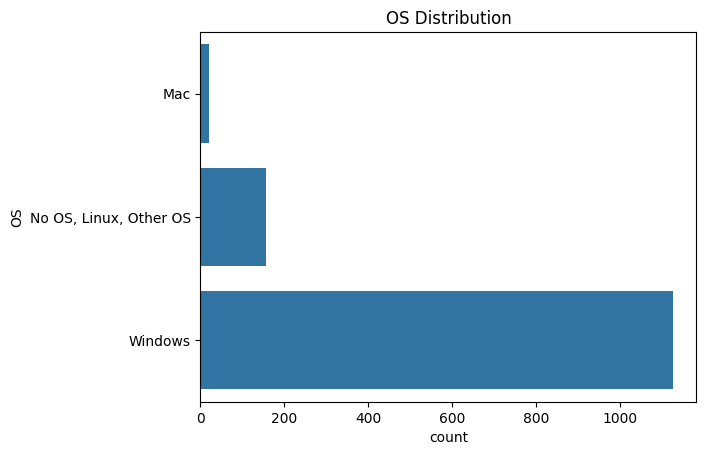

In [279]:
sns.countplot(df, y='OS')
plt.title('OS Distribution')
plt.show()

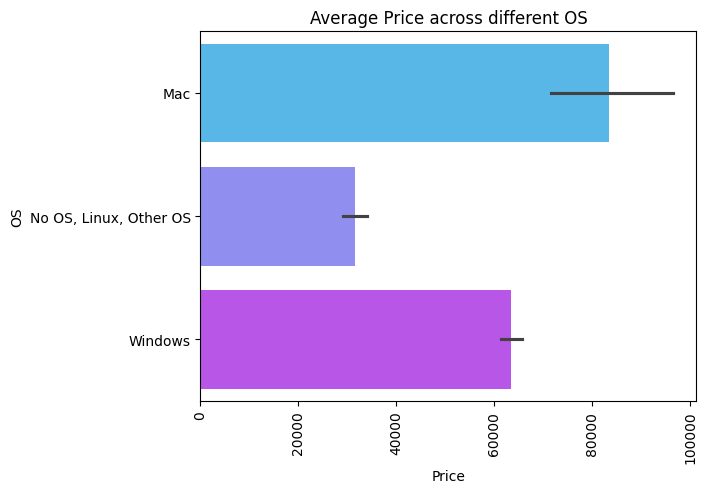

In [280]:
sns.barplot(df, y='OS', x='Price', palette='cool')
plt.title('Average Price across different OS')
plt.xticks(rotation=90)
plt.show()

In [282]:
df.drop('OpSys', axis=1, inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand,Processor,OS
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,1,2.3,Intel,core i5,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,0,1.8,Intel,core i5,Mac
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,0,2.5,Intel,core i5,"No OS, Linux, Other OS"
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,1,2.7,Intel,core i7,Mac
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,1,3.1,Intel,core i5,Mac


In [286]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

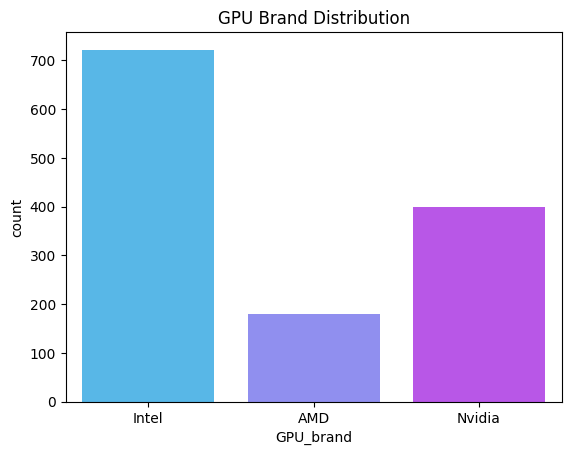

In [297]:
df['GPU_brand'] = df['Gpu'].str.split().str.get(0)

sns.countplot(df, x='GPU_brand', palette='cool')
plt.title("GPU Brand Distribution")
plt.show()

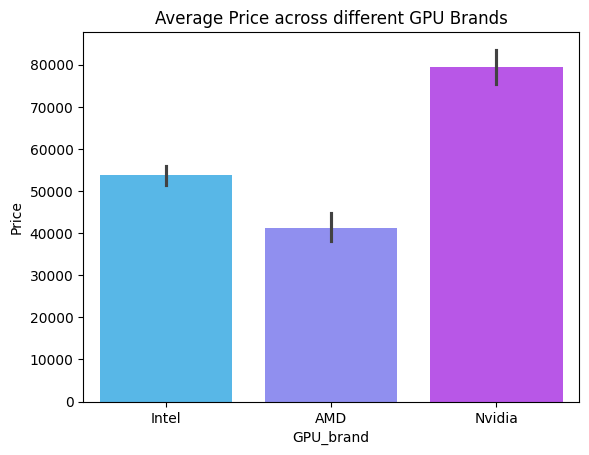

In [299]:
sns.barplot(df, x='GPU_brand', y='Price', palette='cool')
plt.title('Average Price across different GPU Brands')
plt.show()

In [309]:
df.drop('Gpu', axis=1, inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand,Processor,OS,GPU_brand
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,1,2.3,Intel,core i5,Mac,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,0,1.8,Intel,core i5,Mac,Intel
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,0,2.5,Intel,core i5,"No OS, Linux, Other OS",Intel
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,1,2.7,Intel,core i7,Mac,AMD
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,1,3.1,Intel,core i5,Mac,Intel


In [ ]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
df['PrimaryStorage'] = df['Memory'].str.split('+').str.get(0)
df['SecondaryStorage'] = df['Memory'].str.split('+').str.get(1).str.strip().fillna('No')
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand,Processor,OS,GPU_brand,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,1,2.3,Intel,core i5,Mac,Intel,128GB SSD,No,SSD,No
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,0,1.8,Intel,core i5,Mac,Intel,128GB Flash Storage,No,Flash Storage,No
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,0,2.5,Intel,core i5,"No OS, Linux, Other OS",Intel,256GB SSD,No,SSD,No
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,1,2.7,Intel,core i7,Mac,AMD,512GB SSD,No,SSD,No
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,1,3.1,Intel,core i5,Mac,Intel,256GB SSD,No,SSD,No


In [350]:
def get_storage_type(storage):
    if 'ssd' in storage:
        return 'SSD'
    elif 'hdd' in storage:
        return 'HDD'
    elif 'hybrid' in storage:
        return 'Hybrid'
    elif 'flash storage' in storage:
        return 'Flash Storage'
    else:
        return 'No'
    
df['PrimaryStorageType'] = df['PrimaryStorage'].str.lower().apply(get_storage_type)
df['SecondaryStorageType'] = df['SecondaryStorage'].str.lower().apply(get_storage_type)
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand,Processor,OS,GPU_brand,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,1,2.3,Intel,core i5,Mac,Intel,128GB SSD,No,SSD,No
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,0,1.8,Intel,core i5,Mac,Intel,128GB Flash Storage,No,Flash Storage,No
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,0,2.5,Intel,core i5,"No OS, Linux, Other OS",Intel,256GB SSD,No,SSD,No
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,1,2.7,Intel,core i7,Mac,AMD,512GB SSD,No,SSD,No
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,1,3.1,Intel,core i5,Mac,Intel,256GB SSD,No,SSD,No


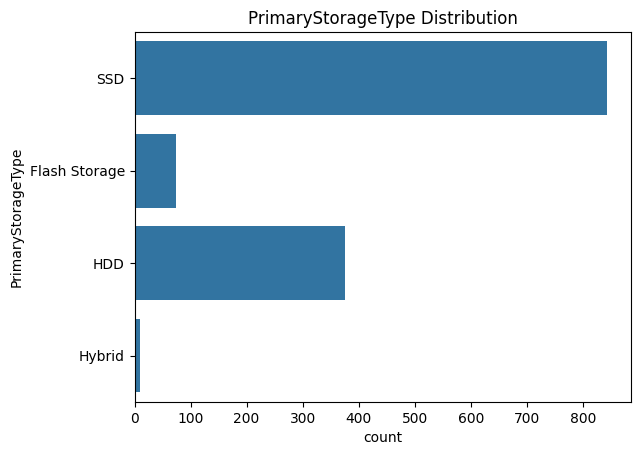

In [360]:
sns.countplot(df, y='PrimaryStorageType')
plt.title('PrimaryStorageType Distribution')
plt.show()

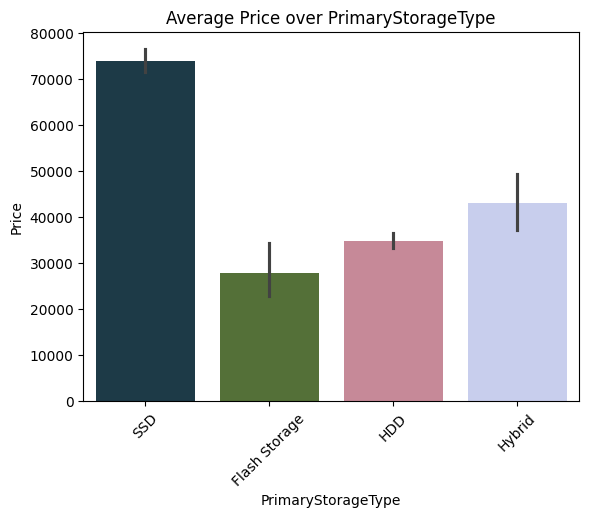

In [359]:
sns.barplot(df, x='PrimaryStorageType', y='Price', palette='cubehelix')
plt.title('Average Price over PrimaryStorageType')
plt.xticks(rotation=45)
plt.show()

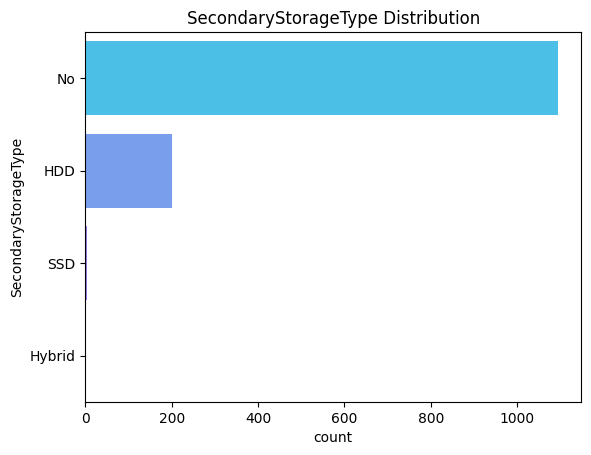

In [362]:
sns.countplot(df, y='SecondaryStorageType', palette='cool')
plt.title('SecondaryStorageType Distribution')
plt.show()

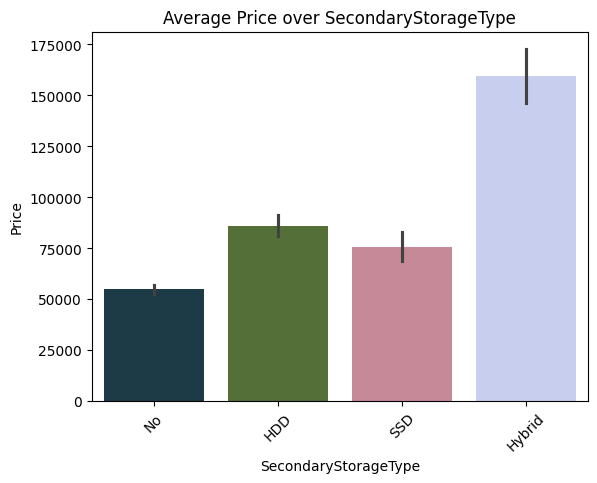

In [363]:
sns.barplot(df, x='SecondaryStorageType', y='Price', palette='cubehelix')
plt.title('Average Price over SecondaryStorageType')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def convert_tb_to_gb(storage):
    if storage == '0':
        return 0
    unit = storage[-2:]
    mag = float(storage.split(unit)[0])
    if 'tb' in unit :
        return 1024 * mag
    elif 'gb' in unit:
        return mag


df['PrimaryStorage'] = df['PrimaryStorage'].str.split().str.get(0).str.lower().apply(convert_tb_to_gb)
df['PrimaryStorage']

0        128.0
1        128.0
2        256.0
3        512.0
4        256.0
         ...  
1298     128.0
1299     512.0
1300      64.0
1301    1024.0
1302     500.0
Name: PrimaryStorage, Length: 1302, dtype: float64

In [386]:
df['SecondaryStorage'].replace('No', '0').str.lower().value_counts()

SecondaryStorage
0               1094
1tb hdd          185
2tb hdd           15
256gb ssd          3
500gb hdd          2
1.0tb hybrid       2
512gb ssd          1
Name: count, dtype: int64

In [403]:
df['SecondaryStorage'] = df['SecondaryStorage'].replace('No', '0').str.lower().str.split().str.get(0).apply(convert_tb_to_gb)
df['SecondaryStorage'].value_counts()

SecondaryStorage
0.0       1094
1024.0     187
2048.0      15
256.0        3
500.0        2
512.0        1
Name: count, dtype: int64

In [407]:
df.corr(numeric_only=True)['Price']

Ram                 0.742905
Weight              0.209867
Price               1.000000
Touchscreen         0.192917
IPSpanel            0.253320
PPI                 0.475368
RetinaDisplay       0.087852
CPU_freq            0.430122
PrimaryStorage     -0.126028
SecondaryStorage    0.294829
Name: Price, dtype: float64

In [409]:
df.drop(columns='Memory', axis=1, inplace=True)

## **Preprocessing the Data and Implementing ML Algorithms**

In [411]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [413]:
# seperate the columns
X, y = df.drop('Price', axis=1), df['Price']
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand,Processor,OS,GPU_brand,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType
0,Apple,Ultrabook,8,1.37,0,1,226.983005,1,2.3,Intel,core i5,Mac,Intel,128.0,0.0,SSD,No
1,Apple,Ultrabook,8,1.34,0,0,127.677940,0,1.8,Intel,core i5,Mac,Intel,128.0,0.0,Flash Storage,No
2,HP,Notebook,8,1.86,0,0,141.211998,0,2.5,Intel,core i5,"No OS, Linux, Other OS",Intel,256.0,0.0,SSD,No
3,Apple,Ultrabook,16,1.83,0,1,220.534624,1,2.7,Intel,core i7,Mac,AMD,512.0,0.0,SSD,No
4,Apple,Ultrabook,8,1.37,0,1,226.983005,1,3.1,Intel,core i5,Mac,Intel,256.0,0.0,SSD,No


<Axes: xlabel='Price', ylabel='Count'>

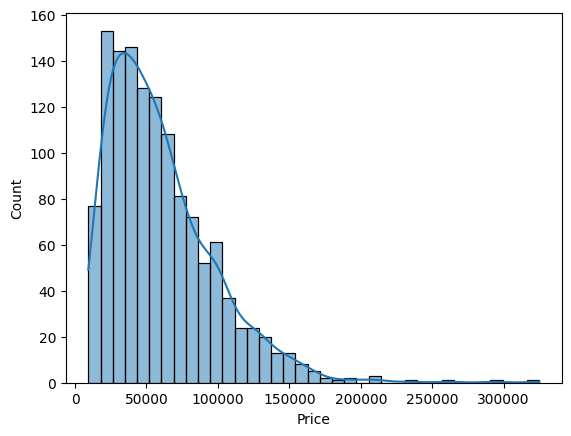

In [417]:
sns.histplot(y, kde=True)

<Axes: xlabel='Price', ylabel='Count'>

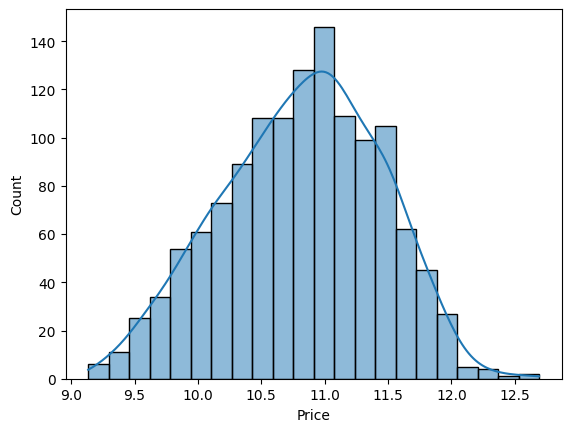

In [416]:
# as the target column is right skewed so we will apply a logarithmic transformation
sns.histplot(np.log(df['Price']), kde=True)

In [418]:
y = np.log(y)
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [420]:
# perform train test split 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(1041, 17)

In [421]:
X_test.shape

(261, 17)

In [426]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPSpanel,PPI,RetinaDisplay,CPU_freq,CPU_brand,Processor,OS,GPU_brand,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType
147,Asus,Notebook,4,2.00,0,0,141.211998,0,1.10,Intel,other intel processors,Windows,Intel,1024.0,0.0,HDD,No
342,HP,Notebook,8,2.10,0,1,141.211998,0,2.40,Intel,core i3,Windows,Nvidia,1024.0,0.0,HDD,No
1003,HP,Notebook,4,1.64,0,0,111.935204,0,2.50,Intel,core i5,Windows,Intel,500.0,0.0,HDD,No
814,Dell,Notebook,8,2.18,0,0,141.211998,0,2.50,Intel,core i5,Windows,AMD,256.0,0.0,SSD,No
344,Dell,Ultrabook,8,1.20,0,0,165.632118,0,1.80,Intel,core i7,Windows,Intel,256.0,0.0,SSD,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,2.40,0,0,141.211998,0,2.50,Intel,core i5,Windows,Nvidia,256.0,1024.0,SSD,HDD
1130,HP,Notebook,8,2.04,0,0,100.454670,0,2.70,Intel,core i7,Windows,Intel,2048.0,0.0,HDD,No
1295,Dell,Notebook,8,2.30,0,0,100.454670,0,2.70,Intel,core i7,"No OS, Linux, Other OS",AMD,1024.0,0.0,HDD,No
860,Lenovo,Notebook,8,2.30,0,1,141.211998,0,2.50,Intel,core i5,Windows,Intel,1024.0,0.0,HDD,No


In [520]:
# define the preprocessing steps using column transformer
one_hot_encoded_cols = ['Company', 'TypeName', 'CPU_brand', 'Processor', 'OS',
       'GPU_brand', 'PrimaryStorageType', 'SecondaryStorageType']

scaling_cols = ['Ram', 'Weight', 'PPI', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

transformer = ColumnTransformer(
    [
        ('One_hot_encoding', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), one_hot_encoded_cols),
        ('scaling', StandardScaler(), scaling_cols)
    ], remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One_hot_encoding',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Company', 'TypeName', 'CPU_brand',
                                  'Processor', 'OS', 'GPU_brand',
                                  'PrimaryStorageType',
                                  'SecondaryStorageType']),
                                ('scaling', StandardScaler(),
                                 ['Ram', 'Weight', 'PPI', 'CPU_freq',
                                  'PrimaryStorage', 'SecondaryStorage'])])

## **Linear Regression**

In [429]:
lr_pipeline = Pipeline(
    [
        ('preprocessing', transformer),
        ('model', LinearRegression())
    ]
)

lr_pipeline.fit(X_train, y_train)

y_pred1 = lr_pipeline.predict(X_test)

In [430]:
# evaluating the linea reg model
print('MAE:', mean_absolute_error(y_test, y_pred1))
print('RMSE:' , root_mean_squared_error(y_test, y_pred1))
print('R2 Score:', r2_score(y_test, y_pred1))

MAE: 0.20910039691847818
RMSE: 0.2644711202965689
R2 Score: 0.8184632162893748


## **SVR**

In [ ]:
svr_pipeline = Pipeline(
    [
        ('preprocessing', transformer),
        ('model', SVR())
    ]
)

svr_pipeline.fit(X_train, y_train)

y_pred2 = svr_pipeline.predict(X_test)

In [538]:
# evaluating the SVR model
print('MAE:', mean_absolute_error(y_test, y_pred2))
print('RMSE:' , root_mean_squared_error(y_test, y_pred2))
print('R2 Score:', r2_score(y_test, y_pred2))

MAE: 0.1569288639055203
RMSE: 0.20412203413304714
R2 Score: 0.8918596173228927


In [574]:
# performing 5 fold cv
cv_svr = cross_val_score(svr_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
np.mean(cv_svr)

0.8763970725939185

In [527]:
param_grid_svr = {
    'model__C': [1.25, 1.5],
    "model__kernel": ['rbf', 'linear', 'poly'],
    "model__epsilon": [0.01, 0.1, 1, 5]
}

grid_search_svr = GridSearchCV(
    estimator=svr_pipeline,
    param_grid=param_grid_svr,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    error_score='raise'
)

In [528]:
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One_hot_encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Company',
                                                                          'TypeName',
                                                                          'CPU_brand',
                                                                          'Processor',
                                                                          'OS',
                                                                          'GPU_brand',
                                                                          'PrimaryStorageType',
                                                                          'SecondaryStorageType']),
                                                                        ('scaling',
                                                                         StandardScaler(),
                                                                         ['Ram',
                                                                          'Weight',
                                                                          'PPI',
                                                                          'CPU_freq',
                                                                          'PrimaryStorage',
                                                                          'SecondaryStorage'])])),
                                       ('model', SVR(C=1.5))]),
             n_jobs=-1,
             param_grid={'model__C': [1.25, 1.5],
                         'model__epsilon': [0.01, 0.1, 1, 5],
                         'model__kernel': ['rbf', 'linear', 'poly']},
             scoring='r2')

In [531]:
grid_search_svr.best_score_

0.8763970725939185

In [575]:
svr_pipeline = Pipeline(
    [
        ('preprocessing', transformer),
        ('model', SVR(C=1.5))
    ]
)

svr_pipeline.fit(X_train, y_train)

y_pred2 = svr_pipeline.predict(X_test)

# evaluating the SVR model
print('MAE:', mean_absolute_error(y_test, y_pred2))
print('RMSE:' , root_mean_squared_error(y_test, y_pred2))
print('R2 Score:', r2_score(y_test, y_pred2))

MAE: 0.1569288639055203
RMSE: 0.20412203413304714
R2 Score: 0.8918596173228927


## **Random Forest Regressor**

In [572]:
rf_pipeline = Pipeline(
    [
        ('preprocessing', transformer),
        ('model', RandomForestRegressor())
    ]
)

rf_pipeline.fit(X_train, y_train)

y_pred3 = rf_pipeline.predict(X_test)

In [570]:
# evaluating the Random Forest model
print('MAE:', mean_absolute_error(y_test, y_pred2))
print('RMSE:' , root_mean_squared_error(y_test, y_pred2))
print('R2 Score:', r2_score(y_test, y_pred2))

MAE: 0.1569288639055203
RMSE: 0.20412203413304714
R2 Score: 0.8918596173228927


In [571]:
# performing 5 fold cv
cv_rf = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
np.mean(cv_rf)

0.880347682547059

In [555]:
param_grid = {
    'model__n_estimators': [50, 80, 100, 150],
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [3, 5, 10],
    'model__min_samples_leaf': [1, 3, 5, 10],
    'model__criterion': ['squared_error', 'absolute_error'],
    'model__max_features': ['sqrt', 'log2', 0.8]
}

grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    error_score='raise'
)

In [556]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One_hot_encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Company',
                                                                          'TypeName',
                                                                          'CPU_brand',
                                                                          'Processor',
                                                                          'OS',
                                                                          'GPU_brand',
                                                                          'PrimaryStorageType',
                                                                          'SecondaryStorageType']),
                                                                        ('scaling',
                                                                         S...
                                                                          'PrimaryStorage',
                                                                          'SecondaryStorage'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [3, 5, 10, None],
                         'model__max_features': ['sqrt', 'log2', 0.8],
                         'model__min_samples_leaf': [1, 3, 5, 10],
                         'model__min_samples_split': [3, 5, 10],
                         'model__n_estimators': [50, 80, 100, 150]},
             scoring='r2')

In [557]:
grid_search_rf.best_score_

0.8802169683304815

In [579]:
rf_pipeline = Pipeline(
    [
        ('preprocessing', transformer),
        ('model', RandomForestRegressor(max_features='sqrt', min_samples_split=3, n_estimators=80))
    ]
)

rf_pipeline.fit(X_train, y_train)

y_pred3 = rf_pipeline.predict(X_test)

# evaluating the Random Forest model
print('MAE:', mean_absolute_error(y_test, y_pred2))
print('RMSE:' , root_mean_squared_error(y_test, y_pred2))
print('R2 Score:', r2_score(y_test, y_pred2))

MAE: 0.1569288639055203
RMSE: 0.20412203413304714
R2 Score: 0.8918596173228927


Ramdom Forest Regressor gives a better r2 score of 0.89 so we will use this for deployment

In [583]:
import pickle

with open('model/model.pkl', 'wb') as f:
    pickle.dump(rf_pipeline, f)